In [2]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
assets = ['DASH-USD', 'XMR-USD', 'ETC-USD', 'LTC-USD',
         'EOS-USD', 'XRP-USD', 'TRX-USD',]

In [7]:
# WEIGHTS 

weights = np.array([1/len(assets) for _ in range(len(assets))])
weights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [9]:
# data

stockStartDate = '2018-10-18'
today = datetime.today().strftime('%Y-%m-%d')
today = '2021-10-18'

In [10]:
df = pd.DataFrame()

"""for asset in assets:
    df[asset] = web.DataReader(asset, data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']"""
df['DASH'] =  web.DataReader('DASH-USD', data_source='yahoo', start=stockStartDate, end=today)['Adj Close']
df['XMR'] =  web.DataReader('XMR-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['ETC'] =  web.DataReader('ETC-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['LTC'] =  web.DataReader('LTC-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['EOS'] =  web.DataReader('EOS-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['XRP'] =  web.DataReader('XRP-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['TRX'] =  web.DataReader('TRX-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']

#df = pd.read_csv('cyptos.csv', sep='\t')

In [13]:
df = pd.read_csv('cryptos.csv', sep='\t')
df=  df.drop(['Date'], axis=1)

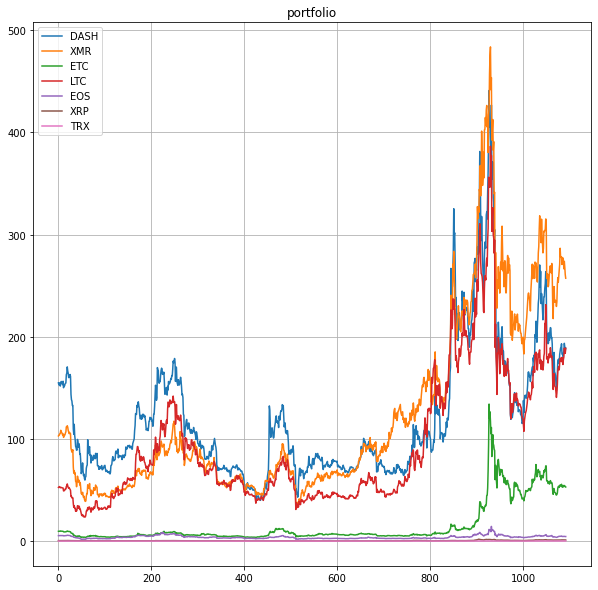

In [14]:
# stock/portfolio

title = 'portfolio'

my_stocks = df
plt.figure(figsize=(10,10))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.grid()
plt.show()

In [15]:
returns = df.pct_change()
returns

,DASH,XMR,ETC,LTC,EOS,XRP,TRX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.012408,0.007871,0.000414,0.009389,-0.003905,-0.007749,-0.008117
2,0.012256,0.000540,0.009410,0.006464,0.007248,0.010949,0.003448
3,-0.001357,0.012729,-0.004967,-0.008377,0.009430,-0.005351,0.001614
4,-0.018368,0.003425,0.037147,-0.013453,-0.007383,-0.007850,-0.015912
...,...,...,...,...,...,...,...
1088,0.014698,-0.030941,0.019633,0.014018,0.003320,0.003478,-0.008511
1089,0.039352,0.027274,-0.002093,0.048278,0.004927,0.007272,0.013843
1090,-0.016894,-0.020352,-0.004298,-0.013902,-0.014109,-0.004782,0.001888
1091,-0.021019,-0.027336,-0.018916,-0.013206,-0.034577,-0.036674,0.000000


In [16]:
cov_matrix = returns.cov() * 252
cov_matrix

,DASH,XMR,ETC,LTC,EOS,XRP,TRX
DASH,0.965189,0.580591,0.700972,0.596583,0.679942,0.535139,0.555772
XMR,0.580591,0.679171,0.522694,0.514120,0.542080,0.449934,0.481055
ETC,0.700972,0.522694,0.985160,0.613354,0.723519,0.543107,0.585638
LTC,0.596583,0.514120,0.613354,0.736677,0.679219,0.542121,0.540277
EOS,0.679942,0.542080,0.723519,0.679219,0.979727,0.652915,0.649617
XRP,0.535139,0.449934,0.543107,0.542121,0.652915,0.975337,0.564643
TRX,0.555772,0.481055,0.585638,0.540277,0.649617,0.564643,0.835044


In [17]:
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

In [18]:
port_variance

0.6257732762668275

In [19]:
# volatility

port_volatility = np.sqrt(port_variance)
port_volatility


0.7910583267160693

In [20]:
return_annual = np.sum(returns.mean() * weights) * 252
return_annual

0.6408457679436081

In [21]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(return_annual, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility/risk: '+percent_vols)
print('Annual variance: '+percent_var)

Expected annual return: 64.0%
Annual volatility/risk: 79.0%
Annual variance: 63.0%


In [24]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 60 kB 4.5 MB/s 
     |████████████████████████████████| 2.7 MB 16.0 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [29]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [32]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('DASH', 0.0), ('XMR', 0.0), ('ETC', 0.6591), ('LTC', 0.02247), ('EOS', 0.0), ('XRP', 0.0), ('TRX', 0.31842)])
Expected annual return: 44.8%
Annual volatility: 88.6%
Sharpe Ratio: 0.48


(0.44754857440731965, 0.8858524119860505, 0.48264086502713305)